# Generative AI

Generative AI helps mimic or approximate human ability such as generation of images from text or writing a easy with a given prompt using chatbots.

So foundational models for generative AI is LLM, which are trained on huge data(trillions of words) for weeks and months with biliions of parameter. These foundational model is also known as base model and its relative size is depend on models memory. More parameter model has more memory it has and better the model is. Also we can finetune it further for any specific task.

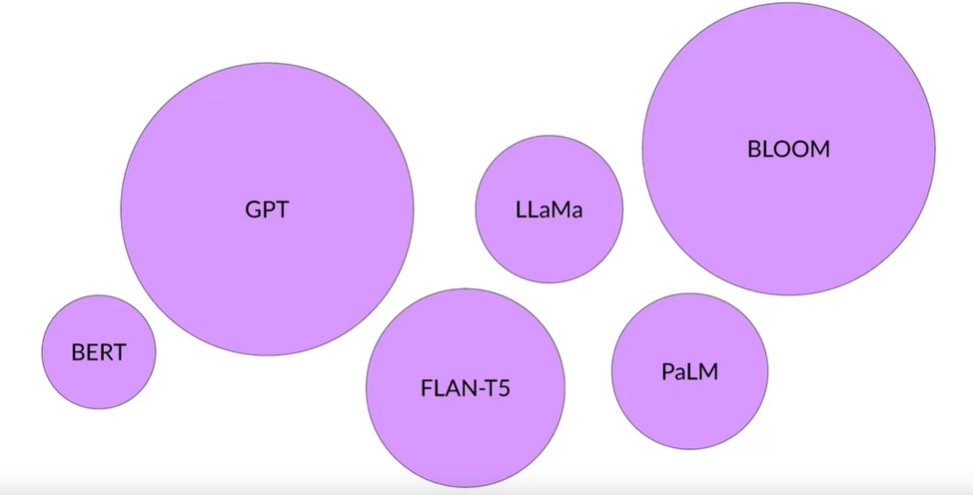

Incontrast LLMs are able to take human instructions through prompts and perform task that human would. These prompts are human written instructions to model. Normally these prompts has certain limits on number of words(usually 1000 words), this is known as **Context Window** of prompt and in model it is denoted by "max_new_tokens" parameter.

After models inference whatever text it has generated is known as completion.

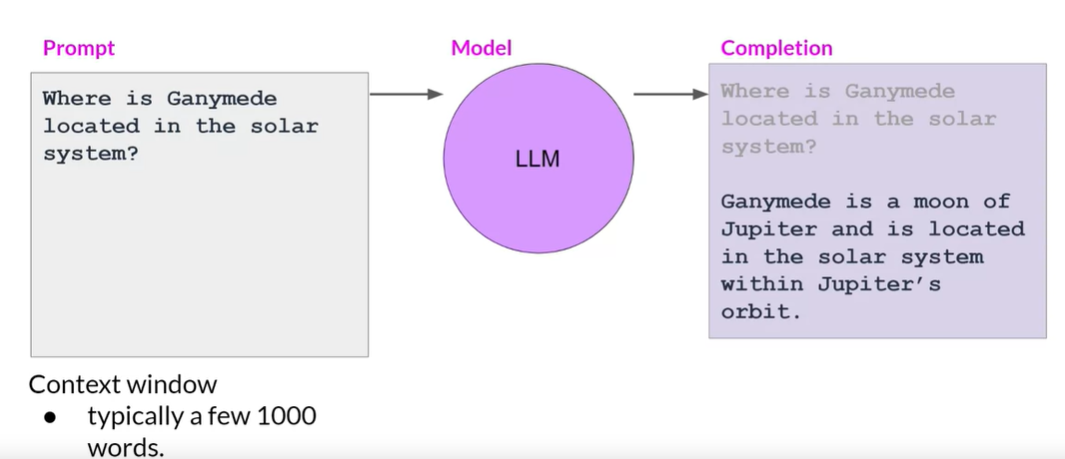

Use cases: Easy writing, document summarization, language translation, entity extraction, code generation, to get information

## History
Historicaly we have been developing generative models, using RNN's sequence to sequence architecture or transformer's encoder or decoder or both architecture.

In transformers, we can see models build using only encoder part of transformer architecture (BERT), also models are using both encoder and decorder architecture from transformer (Bard). Finally decoder only models are from GPT family, Bloom, LLaMa,jurassic,Falcon etc.

## Prompt engineering

**Prompt**: Instructions to model<br>
Completion: Generating output<br>
**Context Window**: Full amount of memory or text that is used for prompt<br>

**Prompt engineering** :Sometimes model doesn't produce desired results during that time we may have to change or revise prompts feeded to model.<br>

**Incontext learning**:Sometimes even after writing clear prompts model doesn't give exact results, so we also need to provide example to the model. This is known as in-context learning.<br>

**Zero shot inference**: In this model produces desired output without providing any examples to model via prompt. Models with large number of parameters are good in it but models with shorter parameters struggles to produce desired results.

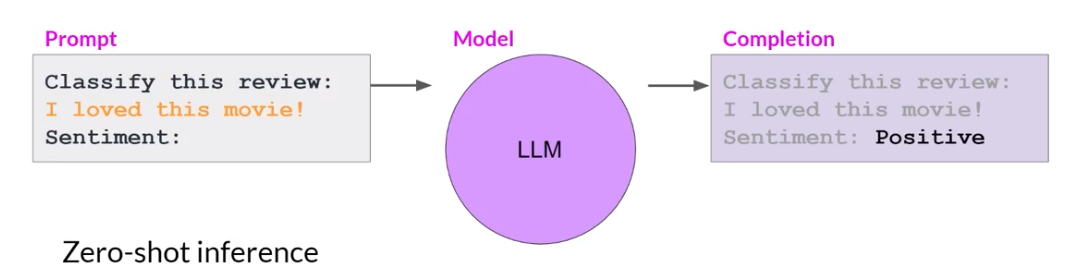 

**One shot inference**: Here we provide 1 example to model via prompt and get output from model. Small model does perform better with 1 shot inference.<br>

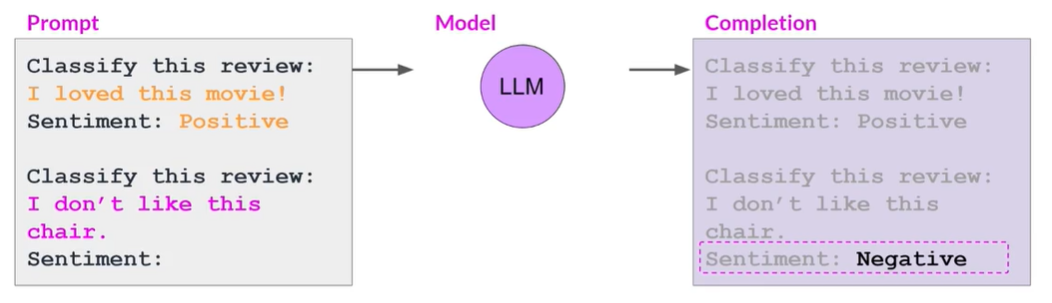

**Few shot inference**: Here we provide more than 1 examples to model via prompt. Smaller model does perform better with this approach.

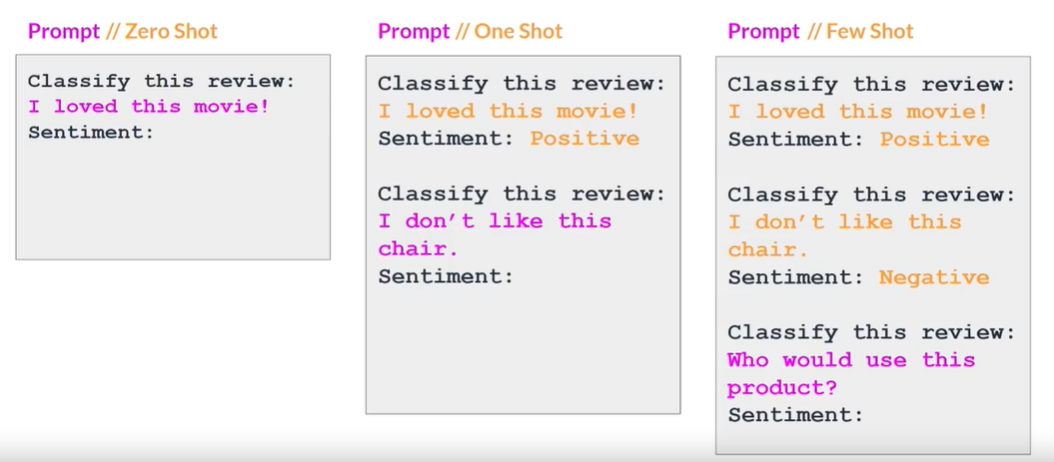

**Note: If your model doesn't perform well after providing 5-6 examples then we should fine tune it.**

## Generative Configuration - inference parameters

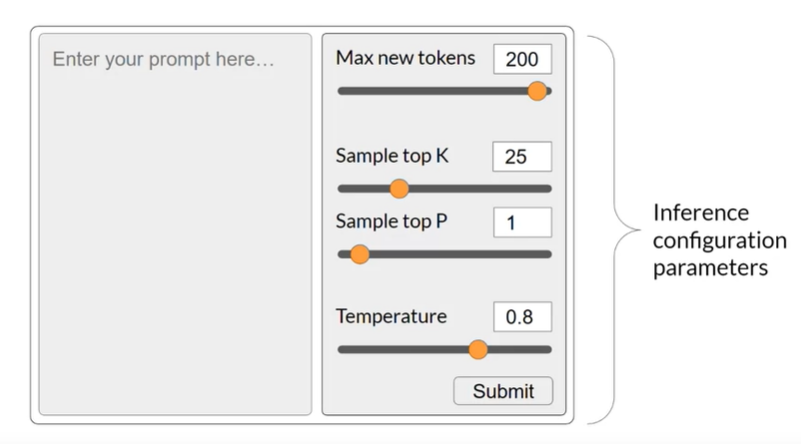

**Max new tokens**: Maximum number of tokens that model would generate. Usual values 100, 150, 200<br>

Output from transformer is a softmax layer with probalities accross all the words present in the dictonary. Most LLM chooses next word to be the word with highest probability, this is known as **Greedy Decoding.**<br>
This method can work very well for short generation but it will not generate new words for repeated input or sentences.

**Random(weighted) sampling** is the easiest way to introduce some variability. The model chooses an output word at random weighted strategy using the probabilities of all token, so that all tokens follow same probability distribution while choosing next word. With the help of this sampling method we reduce probability of words being repeated.

In some implementation we may need to explicitly provide a parameter  to disable greedy and enable greedy using ```do_sampling = True```

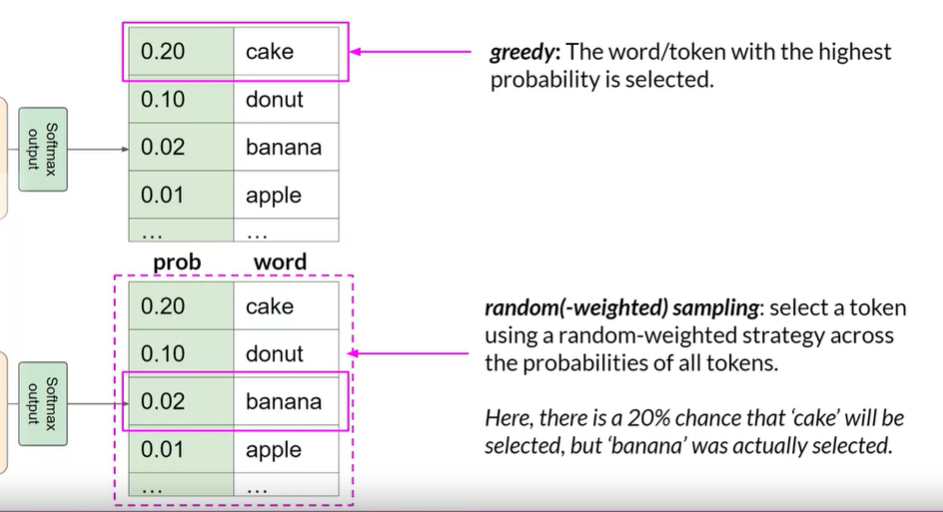

**Top k**: This limits the model to select next word using only top k (based on probabilities) out of all possible tokens. Means if there are 100 words and we set top_k=3 then model will select next word randomly from these top 3 words only.

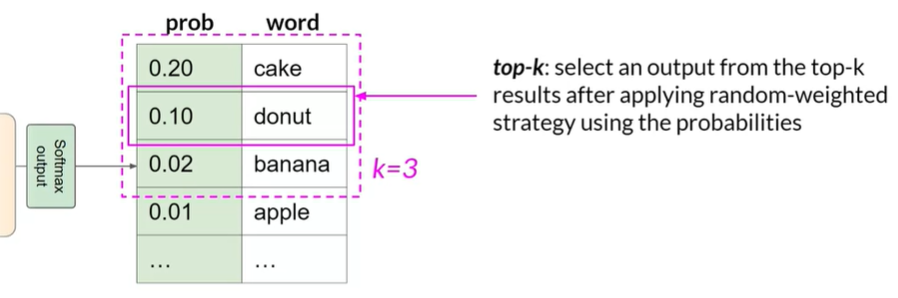

**Top p**: This will select only those words from list whose sum of probabilities is less than or equal to p (**<=P**). Below image depicts how top_p helps.    

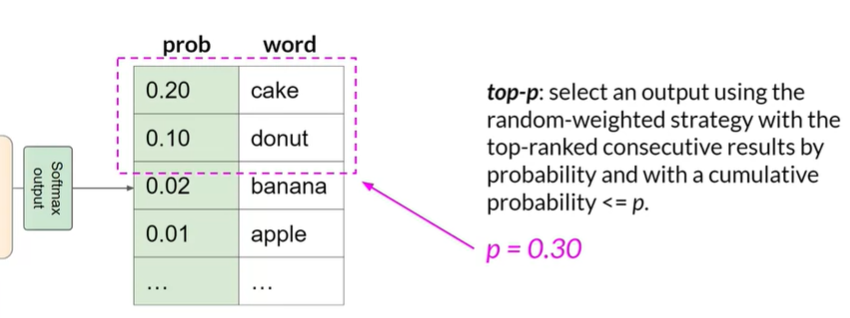


**Temperature**: This controls probability distribution of softmax function. 
If value of temperature is set to less than 1(<1) then their won't be too much variation in the output. Means results will repeat.<br>
If value of temperature is set to more than 1(>1) then their will be variation in the output. Means we will get new results or creative results.

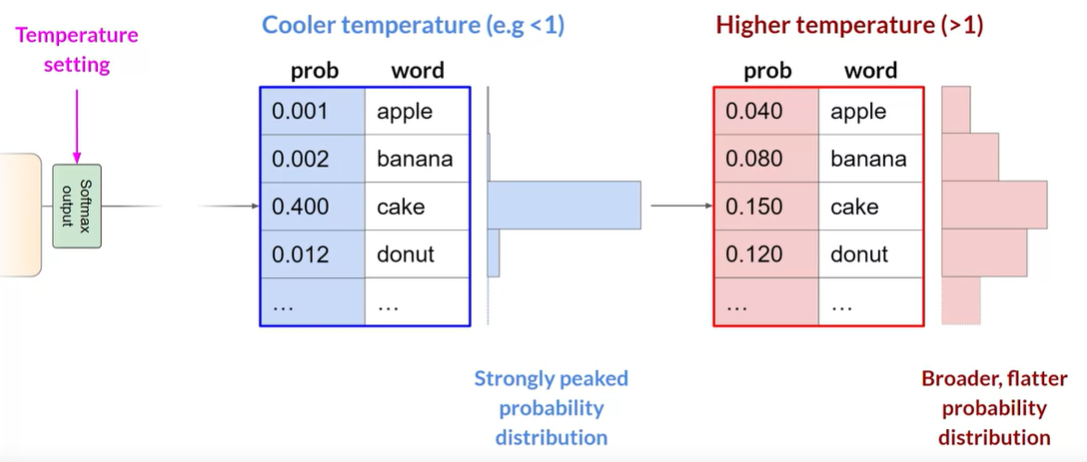

## Project Lifecyle

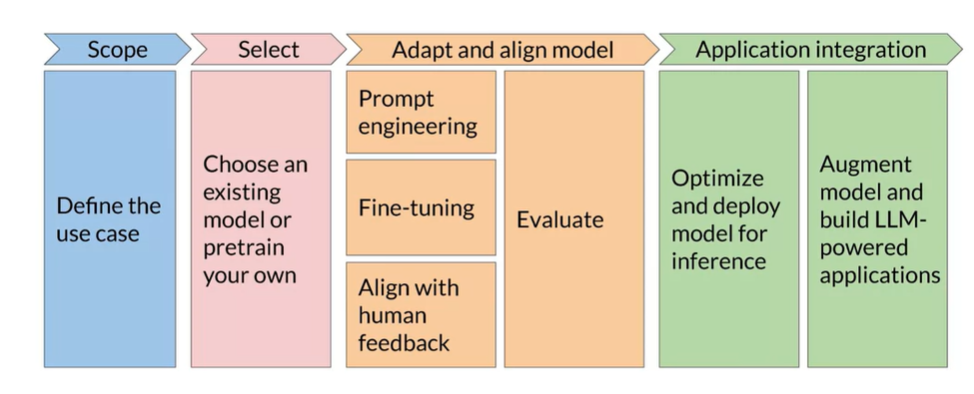

1. First and most important part of Generative AI Lifecycle is defining the scope more accurately and narrowly as possible. As LLMs are capable of carrying out many tasks but defining what function we want for our specific application is most important. It will help save time and compute cost.
2. Next important decision is whether to train model from scratch or use the pre-trained ones. Normally rather than training from scratch we should first try pre-trained ones. Sometimes we may have to train model from scratch.
3. Next step is to check performance and carry-out some additional training. Providing correct prompts and doing some prompt engineering with zero shot or few shot inference we can test the performance of model. Even after this model doesn't perform good then we can fine-tune it further. And to check behaviour of our model we may need to do reinforcement learning with human in middle for additional feedback. Most important thing is to choose metric to evaluate these models.
4. Finally once model is ready we can deploy it and integrate it with our application and optimize it. There are some fundamental limitations of LLMs that can be difficult to overcome through training alone like their tendency to invent information when they don't know an answer, or their limited ability to carry out complex reasoning and mathematics.


## Pretraining LLM

Normally we select pre-trained models which are placed on hubs like huggingface. These trained models also has that model card which has information of how model was trained, which dataset was used, what all tasks it best performs, etc. But in certain scenarios we may need to pre-train it from scratch.

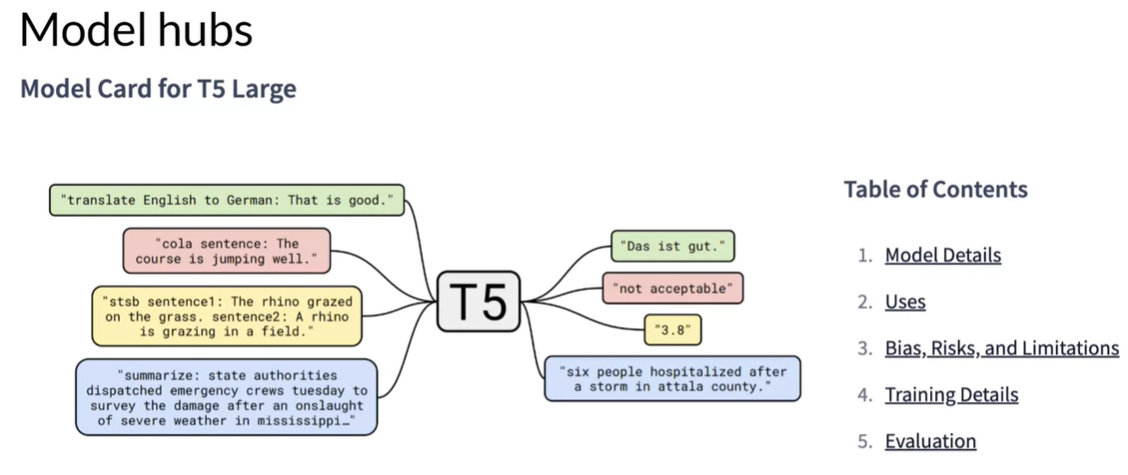

Exact model to choose depends on task we need to carry out.


### High-Level overview on training LLM

1st step is to gather the data,mostly from internet or books or other sources. Then we do data quality checks and remove the biases from data. So this leaves us only 1-3% of original tokens. after that Model uses this data to do self-supervised learning inorder to understand patterns or meaning of tokens and generates embeddings. Training objective of model is to reduce loss.

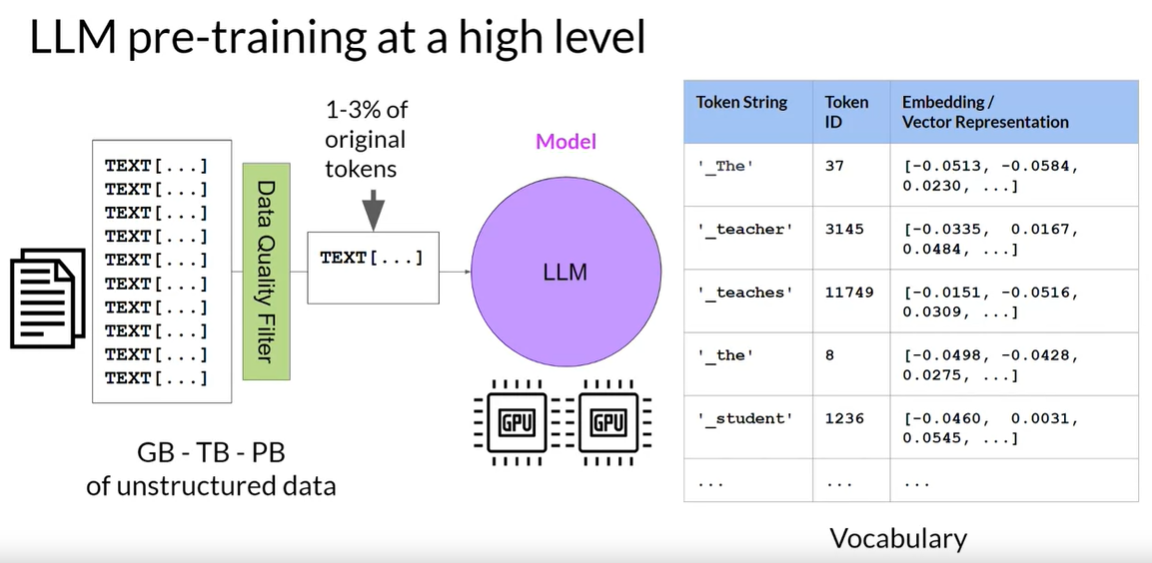

### Encoder only model (autoencoding model)

It has only encoder part of transformer architecture and pre-trained using MLM (Masked language modeling). Here tokens in the sentence are randomly masked and the training objective is to predict masked tokens inorder to reconstruct original sentence,this is also known as denoising objective. This way model learns bidirectional representation of input sentence.

**Use Cases**: 
1. Sentiment analysis
2. Named entity recognitions
3. Text Classification.

**Examples**:
Bert, Roberta

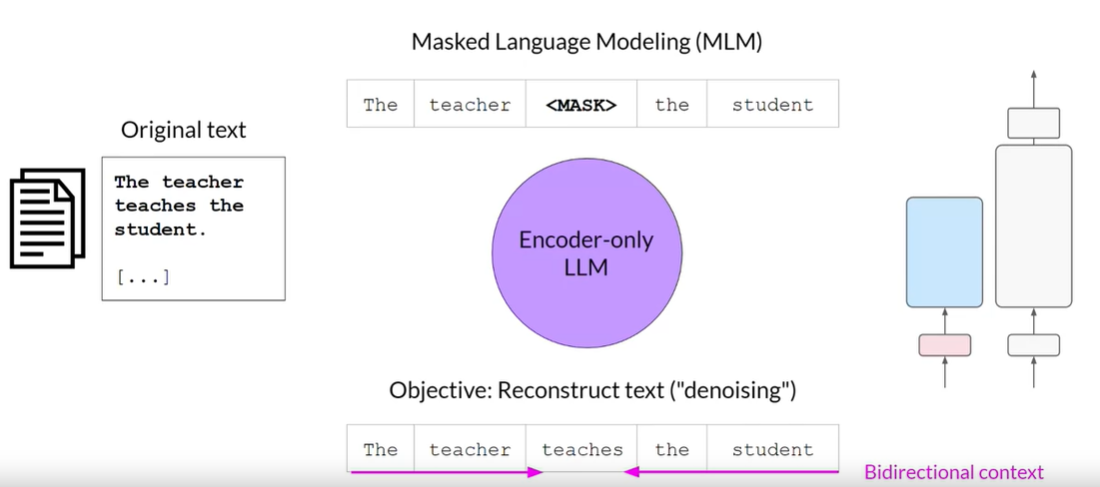

### Decoder only model (Autoregressive model)

This kind of models uses only decoder part of transformer architecture. It is pre-trained using Causal Language Modeling (CLM). While making predictions for next word it only looks at the words till the word in question. Then model iterates over the input sequence to predict next token one by one. This way model learns about language.

**Use Cases**: 
1. Text generation
2. Other emergent behaviour
    . Depends on model size

**Examples**:
GPT, BLOOM

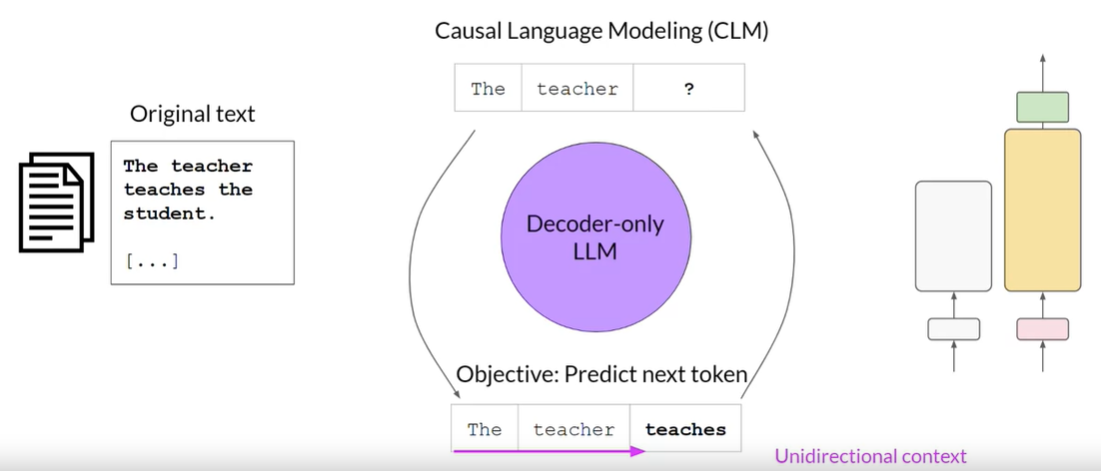

### Encoder-Decoder model (Sequence-sequence model)

These kinds of models uses both encoder and decoder part of transformer architecture. It is pre-trained using Span corruption. Here sequences are masked randomly and these sequences then mapped to unique sentinel tokens. Sentinel tokens are special tokens added to the dictionary but don't corresponds to any actual token. Then decoder's objective is to reconstruct the span. Output is sentinel tokens followed by predicted tokens.

**Use Cases**: 
1. Translation
2. Text Summarization
3. Question answering

**Examples**:
T5, BART

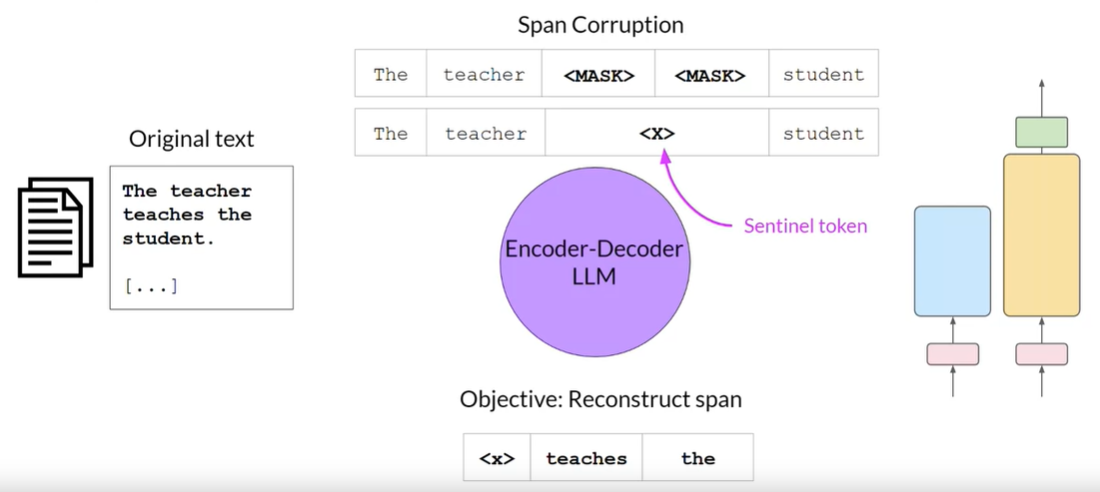

To Summarize all these into 1 page:

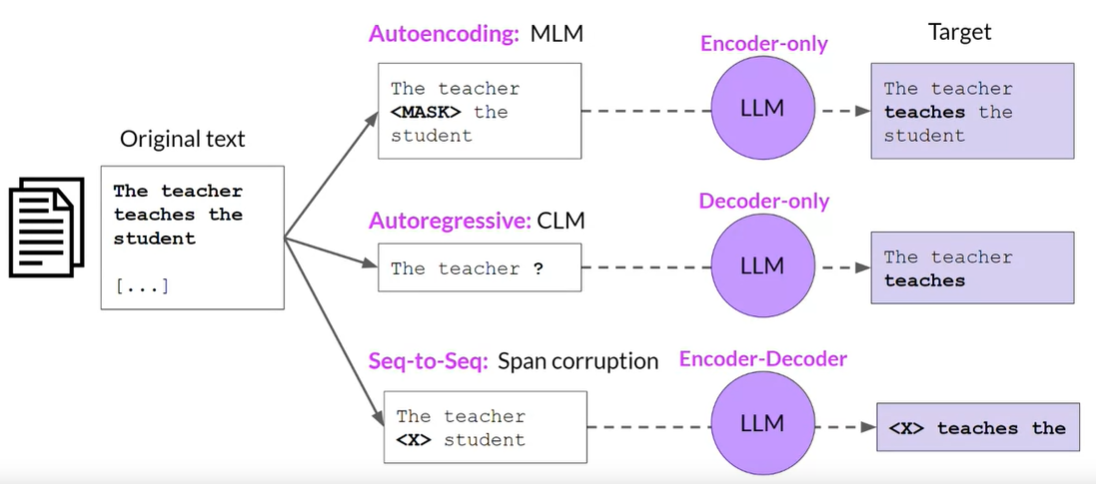


### Computational Challenges

One of the most common issue with LLM is it requires too much memory and sometimes we may run out of memory. We may get below error.

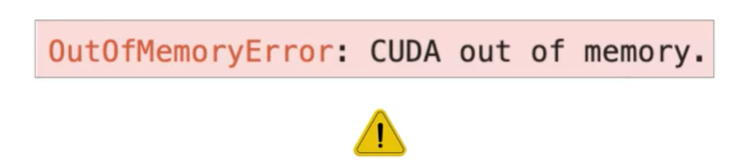

CUDA, short for Compute Unified Device Architecture, is a collection of libraries and tools developed for Nvidia GPUs. Libraries such as PyTorch and TensorFlow use CUDA to boost performance on metrics multiplication and other operations common to deep learning.

Let's understand why we need too much of memory for LLMs training:

Approximate GPU RAM needed to store 1B parameters:


1 parameter = 4 bytes(32-bit float)<br>
1B Parameter = 4 x $10^9$ bytes = 4GB @ 32-bit full precision

This is only for model parameters.

But during training, apart from model parameters we need other parameters too

| |Bytes per parameter|
| :-: | :-: |
| Model Parammeters (Weights) | 4 bytes per parameter |
| Adam optimizer (2 states) | +8 bytes per parameter |
| Gradients | +4 bytes per parameter |
| Activations and temp memory (variable size) | +8 bytes per parameter (high-end estimate) |
| Total | = 4 bytes per parameter +20 extra bytes per parameter |

So considering all of these parameters we will need 80GB memory @32-bit full precision, which is 20 times more than memory required to store the model. Which is very compute expensive for only 1 Billion parameter model training. Normally LLMs model has more than 1 Billion parameter.

### Solution

**Quantization**: It is the process of reducing data type from high precision to low precision and at end reducing memory requirements of model training process.

In this we can covert data type from FP32 (range from ~ 3 $e^{-38}$ to ~3 $e^{38}$ ) to FP16 or BFLOAT16 (half precision 16-bit floating point) or INT8. This will help reduce memory requirements for training model. 

**Quantization with FP16**

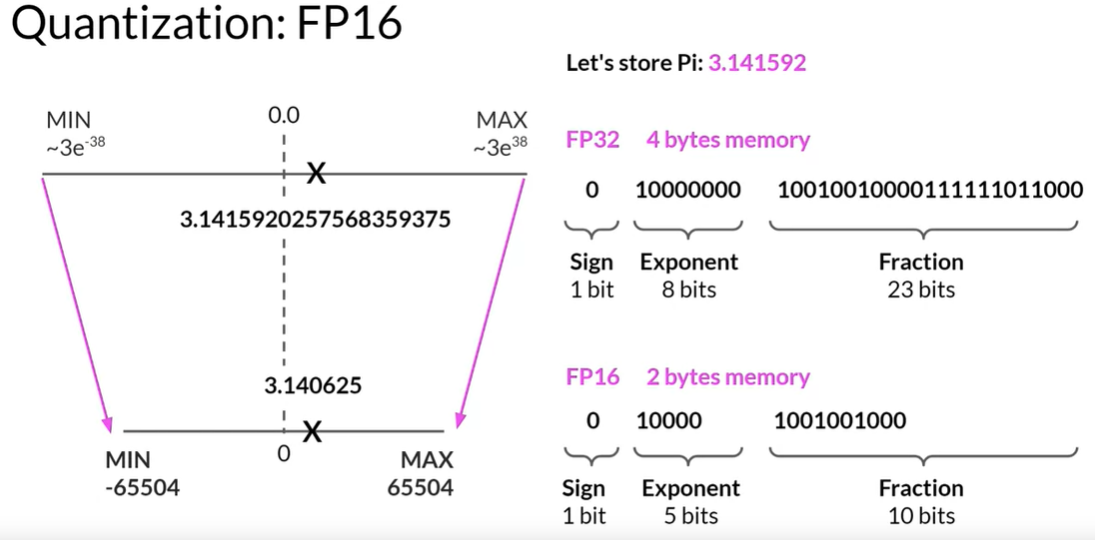

**Quantization with BF16**
BFLOAT16 is has become popular data type for many LLM. It is developed by Google Brain. It is hybrid between half precision FP16 and full precision FP32. It is also described as truncated 32-bit float as it captures full range of 32-bit float but uses only 16-bits. It uses 8 bit exponent and only 7 bits for fraction.

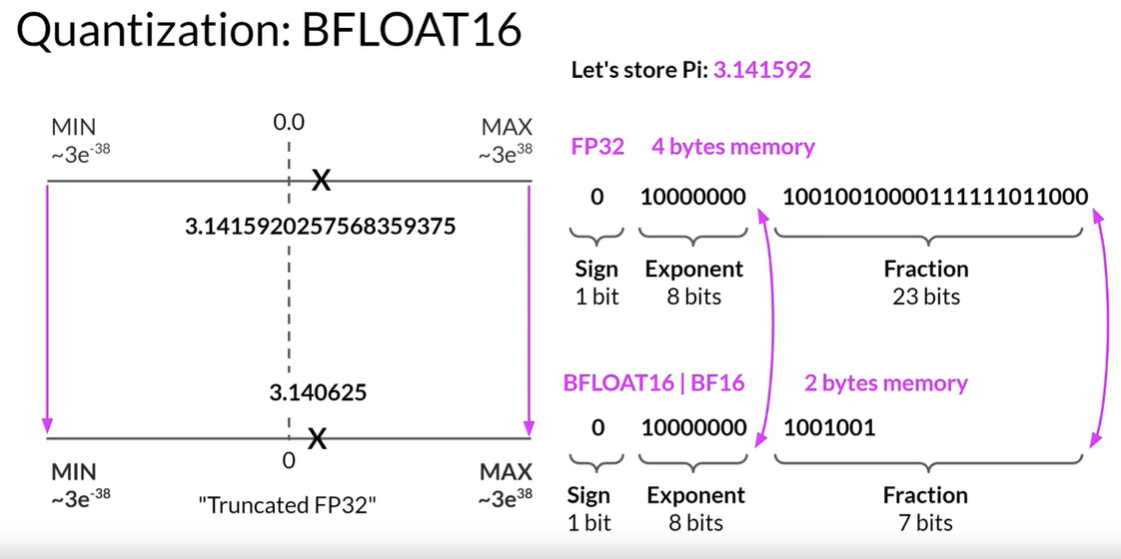

**Quantization with INT8**

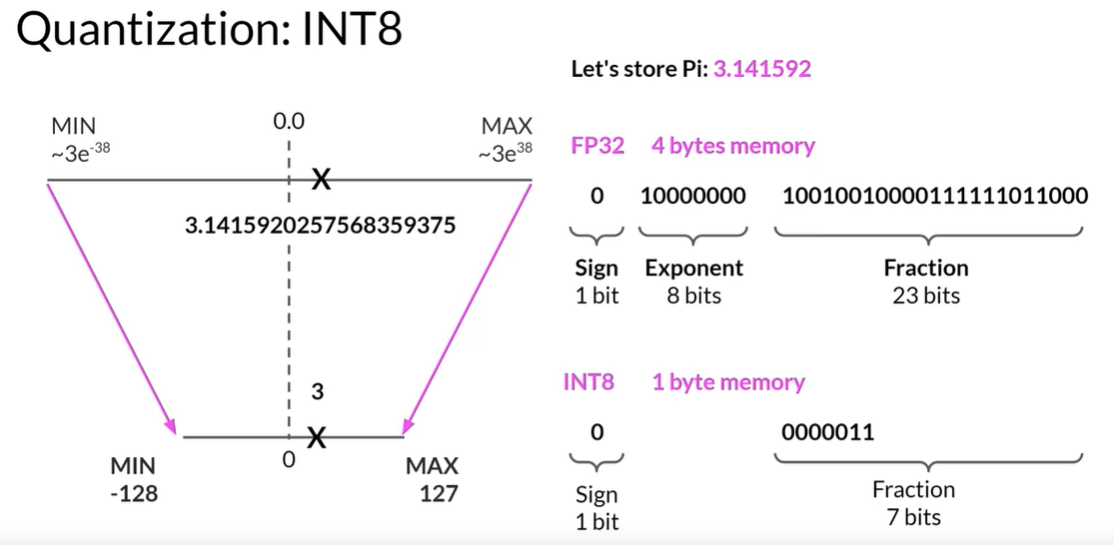

**Quantization Summary**

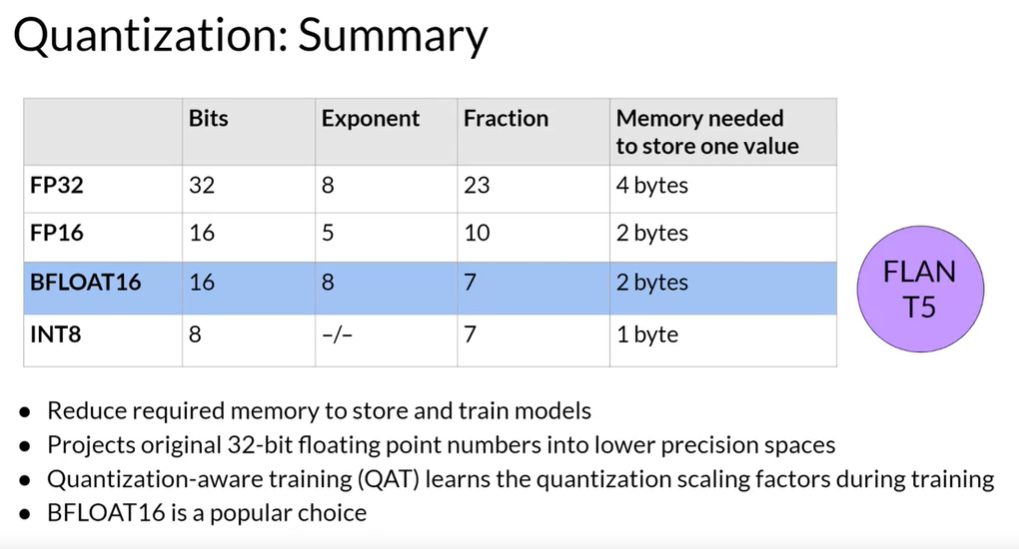

## Multi-Gpu Compute Strategy

We may need to use multi-GPU strategy when model size is very huge and would be impossible to fit on single GPU.

### DDP(Distributed Data Parallel)
In this approach data is processed in batchwise fashion on multiple GPUs. And this has implemented in pytorch distributed data-parallel or DDP for short. DDP copy model into every GPU and sends batches of data to each GPU. Each dataset is processed in parallel and then later combines results of each GPU at synchronization step. This combined model is then copied to all GPUs so that it each GPU will have its own updated copy.

This implementation allows parallel computations across all GPUs that results in faster training. <br>
**Note that DDP requires that your model weights and all of the additional parameters, gradients, and optimizer states that are needed for training, fit onto a single GPU.** 

If your model is too big for this, you should look into another technique called modal sharding

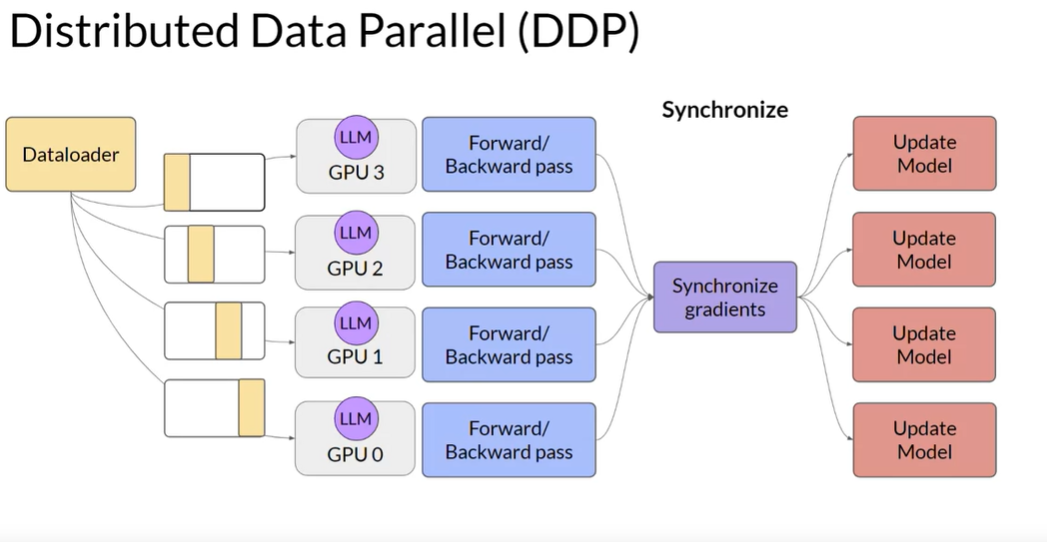

### Model Sharding

Popular implementation of model sharding is by Pytorch's **Fully Sharded Data Parallel(FSDP)** which is motivated by "ZeRo" Paper(Zero data overlap between GPUs). This helps share model across GPUs when your model doesn't fit into memory of single GPU.

**Fully Sharded Data Parallel(FSDP)**:
As learned earlier along with model parameter other parammeter such as gradient parameter, Adam optimizer parameter, activations and temp memory also consume memory while training. So rather than replicating model on each GPU, we will keep only part of it known as model shard. 

ZeRO Stage 1, shards only optimizer states across GPUs, this can reduce your memory footprint by up to a factor of four.<br>
ZeRO Stage 2 also shards the gradients across chips. When applied together with Stage 1, this can reduce your memory footprint by up to eight times.<br>
Finally, ZeRO Stage 3 shards all components including the model parameters across GPUs. When applied together with Stages 1 and 2, memory reduction is linear with a number of GPUs. For example, sharding across 64 GPUs could reduce your memory by a factor of 64.<br>

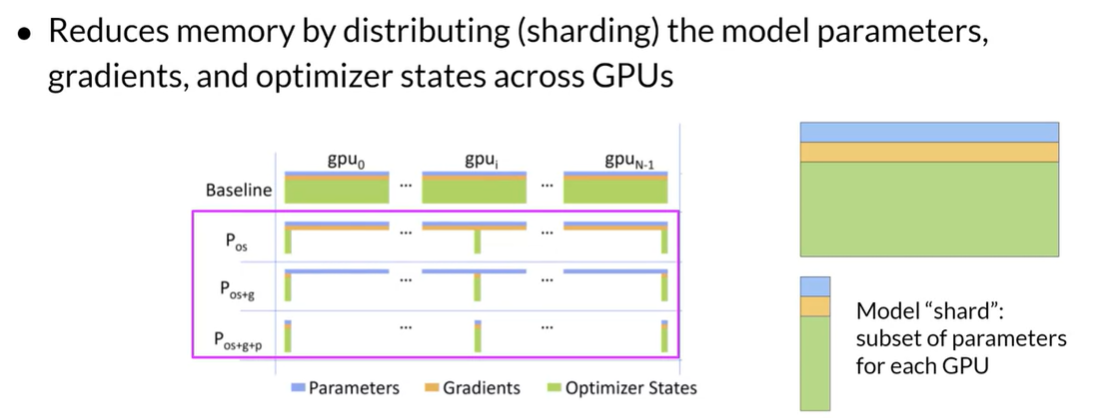

With DDP, we only distribute data across GPUs but with FSDP we also distribute or shard model parameter, optimizer states, gradient across all GPUs. Each GPU demands the data from other GPU to unshard it before Forward and backward pass. This helps model to update its parameter. After the operation it releases unsharded data back to GPUs as original sharded data.
After the backward pass, in the synchronization step it synchronizes gradients across all GPUs same way as that of DDP.

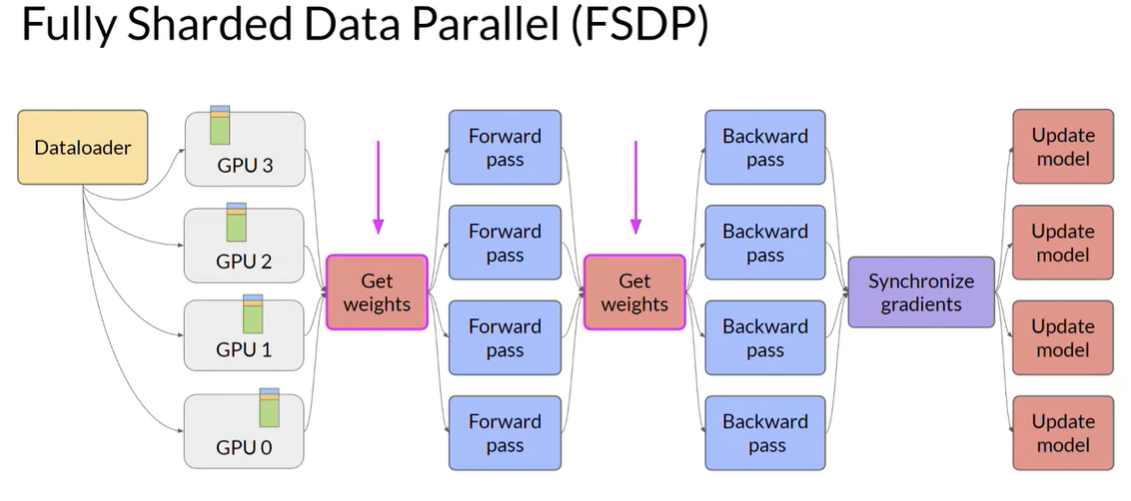

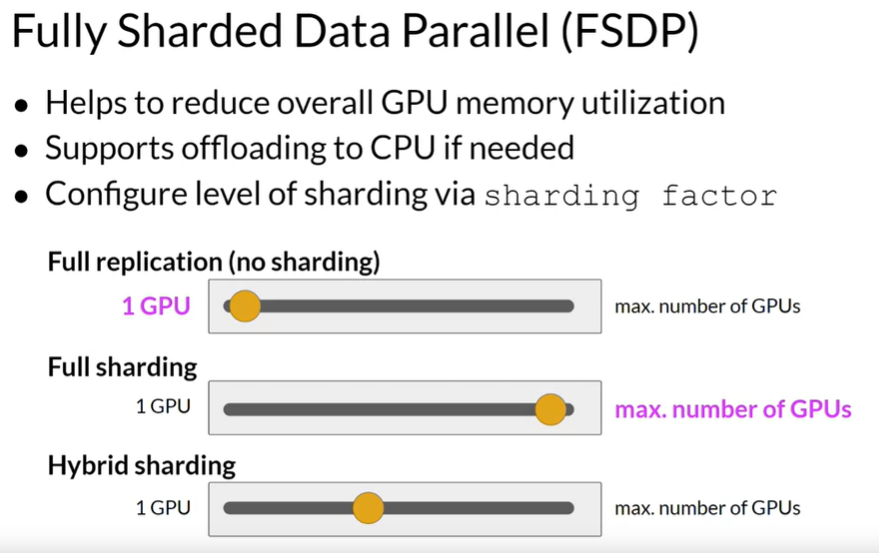

**Impact of FSDP**<br>
From below pic, we can see that even small models can use FSDP. 

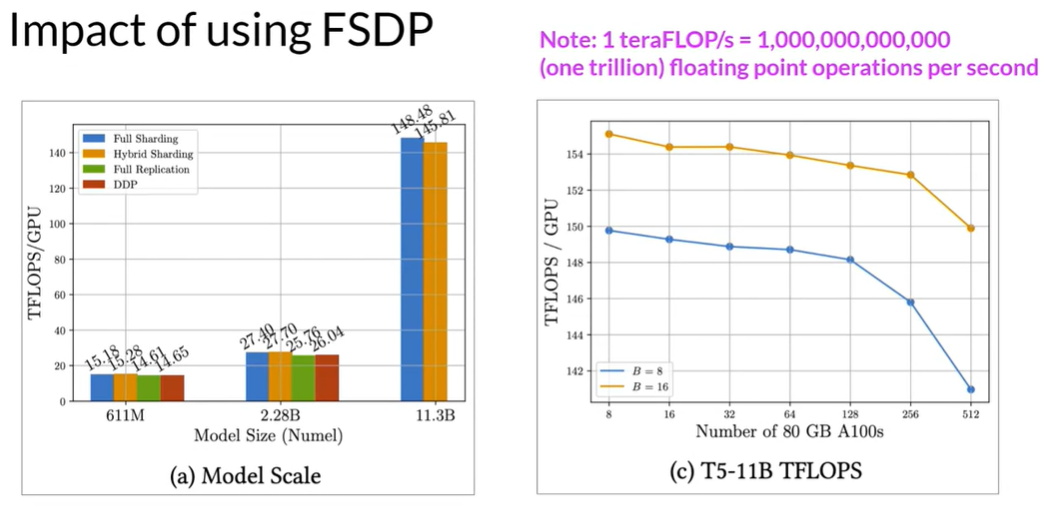

## Determining Model Size

Goal of pre-training is to maximize model's performance. 

Inorder to improve model's perfomance we may either have to improve training data or number of parameters (model size). But we also need to keep in mind the compute budget. To minimize the compute budget we may need to train small model

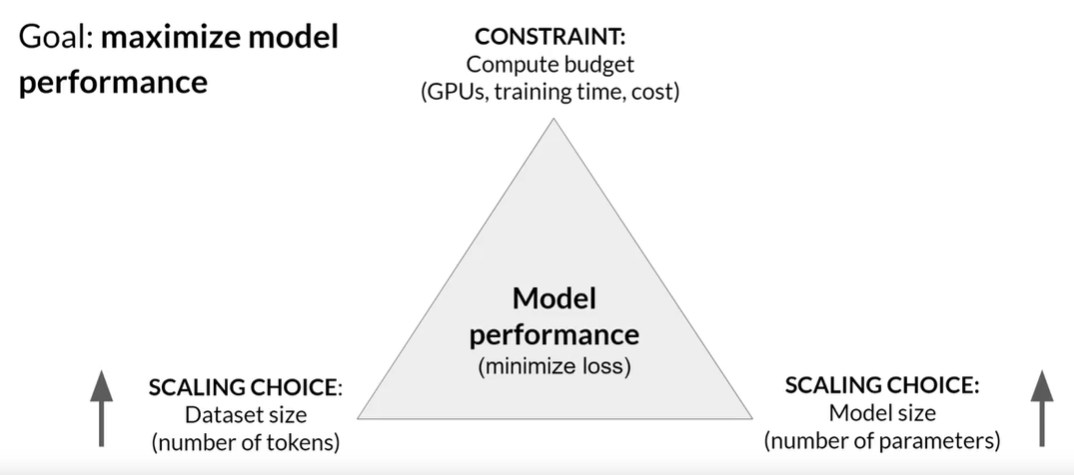

**Unit of Compute:**<br>
This helps you quantifies required compute resources.

1 petaflops/s-day = # floating point operation performed at rate of 1 petaFlop per second for one day.

To perform 1 petaFLOP/s for whole day we need 8 NVIDIA V100s chips. Or if we choose more better chips then we may need 2 NVIDIA A100s GPU.
**Note: 1 petaFLOP/s = 1,000,000,000,000,000 (One quadrillion) floating point operations per second**

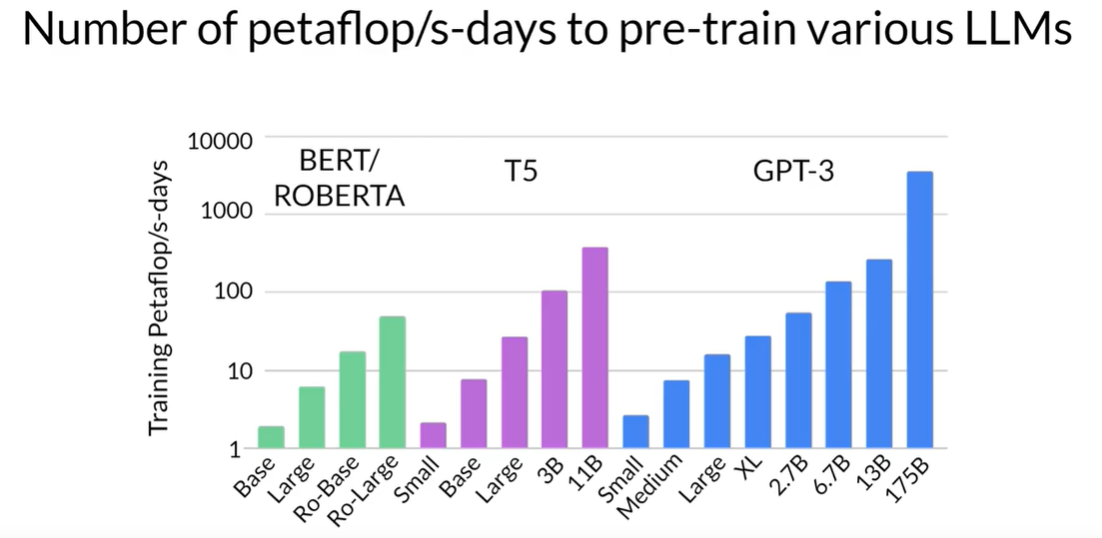

So from above chart we can see that bigger models do require more compute resources to train and also require more data to achieve good performance.

But it turns out that researchers have found well defined relationships between these 3 scaling choices.

**Compute budget vs model performance**

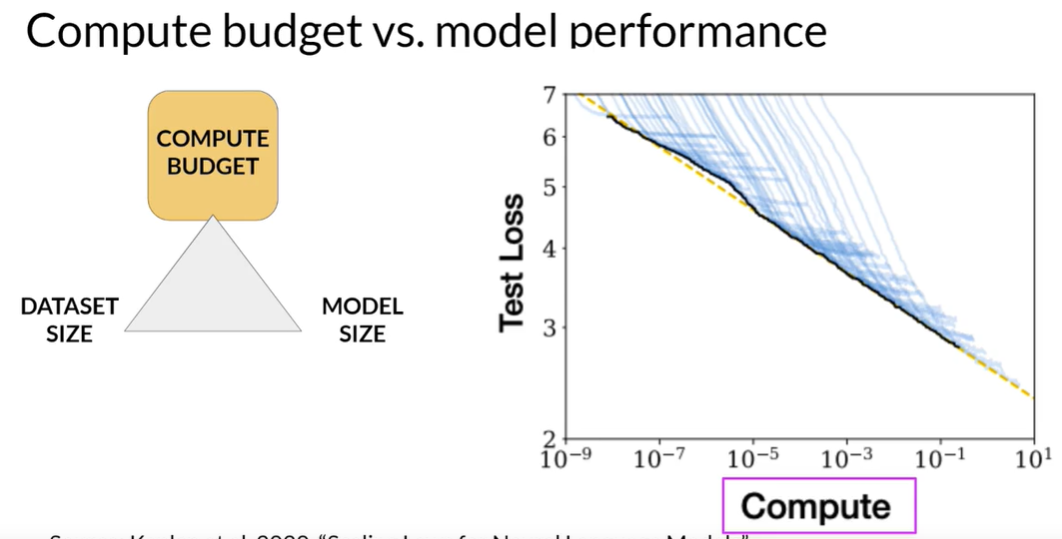

In above fig x-axis represent compute with unit of petaFLOP/s and y-axis represents test loss.<br>
This relationship is shown by power-law relationship. Power-law is mathematical relationship between 2 variables which are directly proportional to each other and other is in power of 1st variable.

So from above graph we can see, to achieve good performance we need to improve compute budget.

But in practical scenario we will have constraints on compute budget such as hardware, Project timeline and financial budget.

**Data size and model size vs performance**

If we keep compute budge fix, then also we can see power-law relationship between data size or model size vs model performance.
Same is observed in below graphs as well.

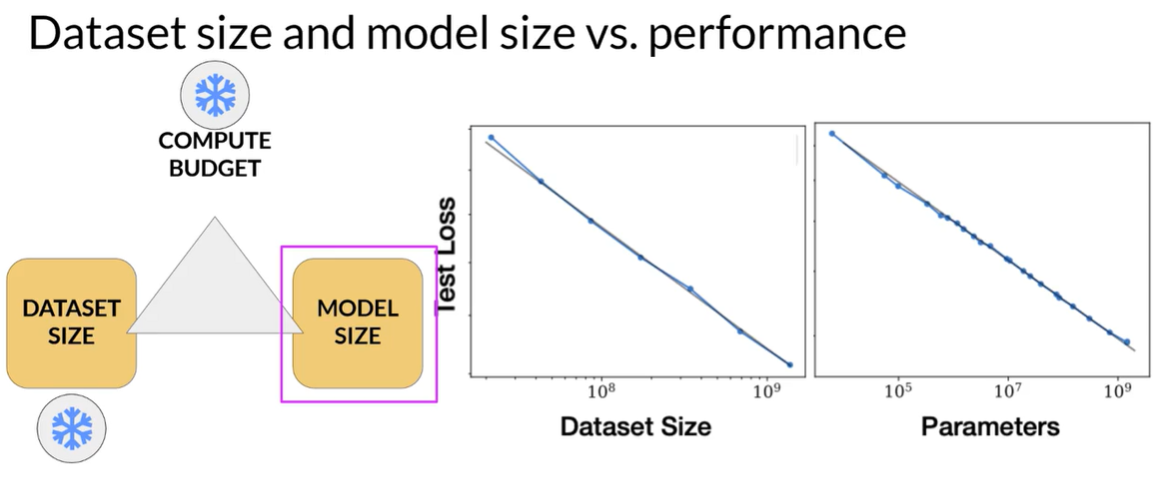

So to find out optimal values for all 3 scaling choices then researchers have published chunchilla paper. Objective of this chunchilla paper was to find out optimal value of model parameter and volume of training data for given compute budget. 


### Compute optimal models

Compute optimal models can outperform large models if they are trained with enough datasize considering model's parameter size.

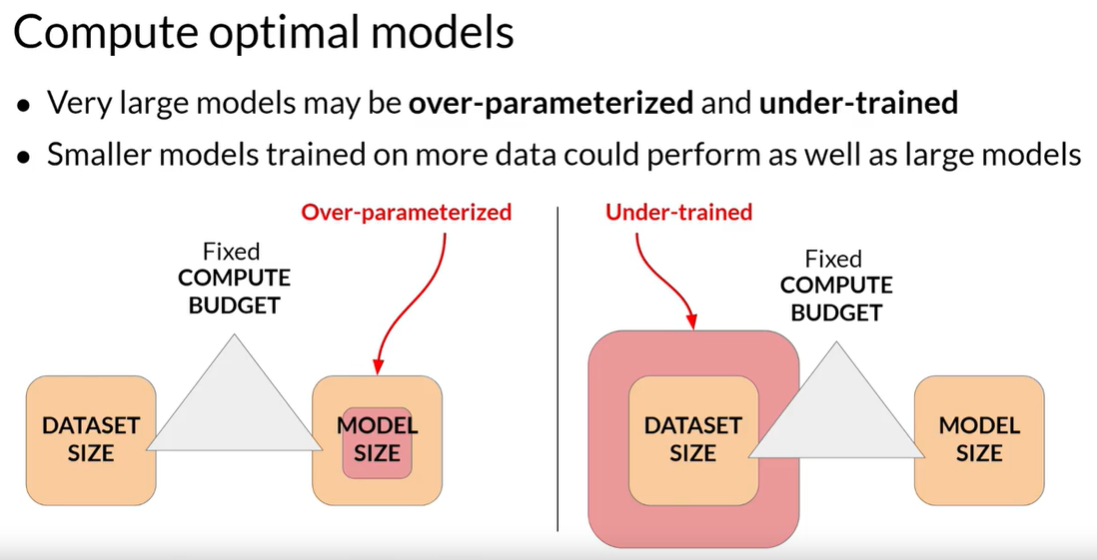

**So as per chinchilla paper, datasize for training should be 20 times the number of parameters of model.**

So another study that chinchilla highlighted that compute optimal chinchilla model outperforms non compute optimal models such as GPT-3 on large range of downstream evaluation tasks.

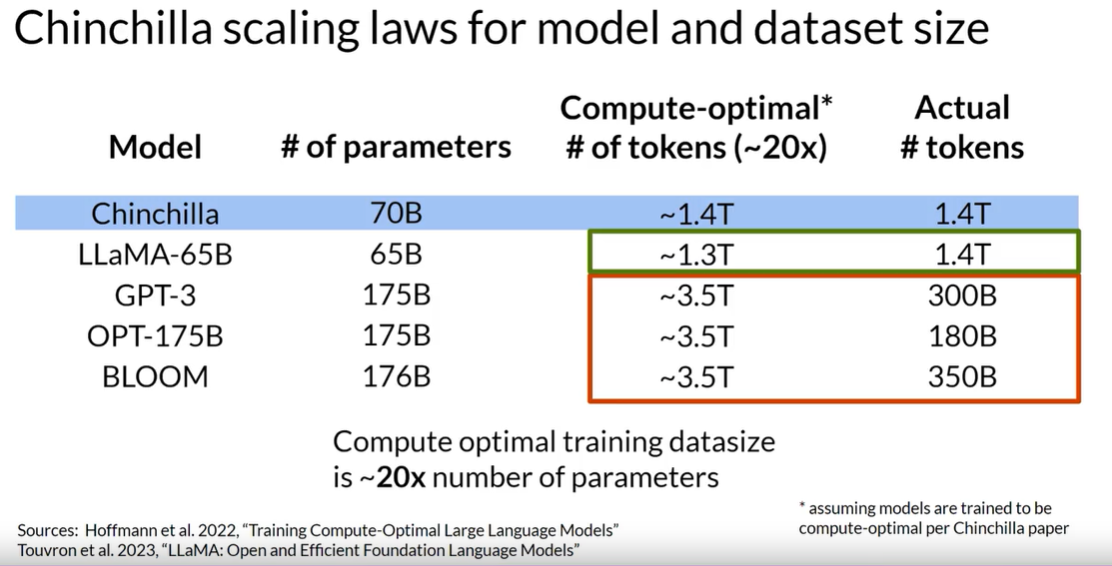

**Model size vs time**

As per the chinchilla paper, more parameter doesn't mean better performance, But right number of parameters i.e. optimal parameter with correct datasize could boost performance of model.

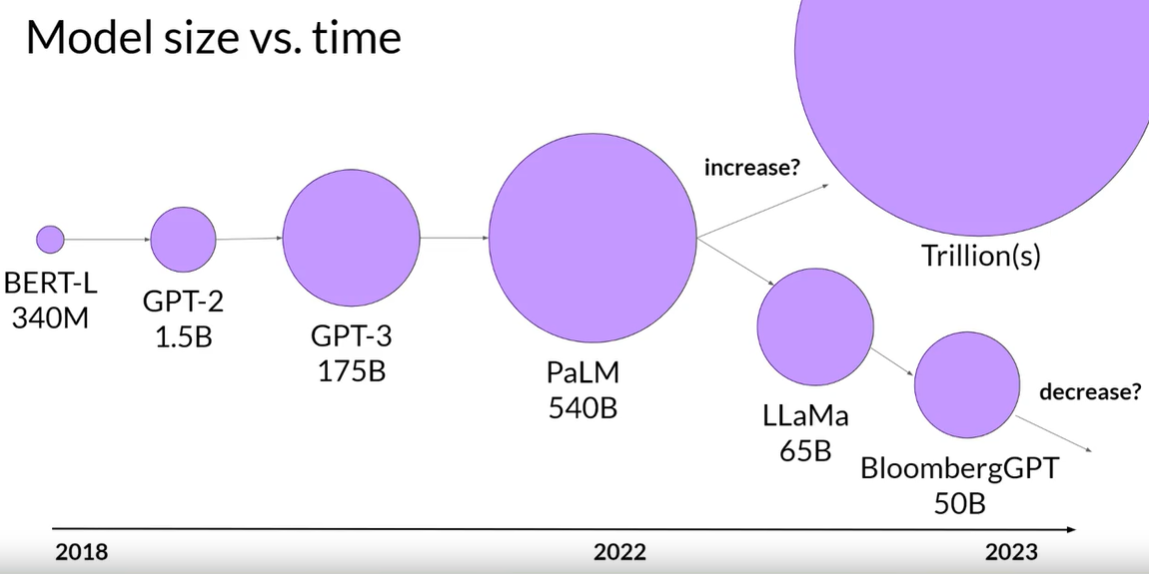